You need to work on a popular Fashion MNIST dataset for this project. The dataset includes tiny images of fashion pieces. The objective is to create a set of supervised learning models that can predict the type of item based on its image. You can use all different models that you learned about them in this course for yourr work. Keep in mind that this is a project, not a class assignmnet. So, not all steps are predetermined and you have more flexibility, and the final outcome is likely to be more detailed.

In order to load the dataset you need to have `tensorflow V2` on your computer. Use the following code to install the package

In [ ]:
#!pip install --upgrade tensorflow
# !pip install keras


You can also check the version of it using the following code.

In [1]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.__version__

'2.4.0'

Now, it's time to load the dataset

In [2]:
from tensorflow import keras
from keras.utils import np_utils
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

In [3]:
X_train.shape

(60000, 28, 28)

As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

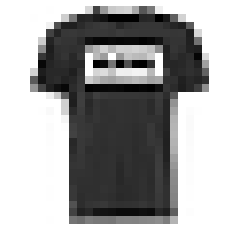

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_train[1]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [5]:
y_train[1]

0

The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [6]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[1]])

T-shirt/top


Now, it's your turn,



<ul>
    <li><b>Task1:</b> Use the train set to train various supervised models and evaluate their performance using the test set.</li>
    <ul>
        <li>Use different supervised learning models.</li>
        <li>Use different metrics such as <b>accutacy</b>, <b>precision</b>, <b>AUC</b>, and ... in your model evaluation. </li>
        <li>It is not enough to report the metrics. It is crucial that you interpret the metrics for each model and compare them across different models.</li>
        <li> You may need to use the cross validation methods for hyperparameter selection.</li>
        <li> Specify the model that outperforms the other models.</b>
    </ul>
    <li><b>Task2:</b> Use the best model to predict your own fashion pieces.</li>
    <ul>
        <li>Take a picture of five fashion pieces of your own (take pictures in square format).</li>
        <li>Resize images to the correct size (28,28).</li>
        <li>Grayscale your images.</li>
        <li>Visualize all the images side by side</li>
        <li>Use the best model in Task 1 to predict the label of each of your own images.</li>
        <li>How accurate is the final result?</li>
    </ul>
</ul>

# Task 1

### Overview
<ul>
    <li><b>Data exploration</b> 
    <li><b>Different supervised learning models:</b> calculate the accuracy score,precision score,recall score and F1 score for each model. 
    <ul>
        <li>Model 1- Neural network</li>
        <li>Model 2 - LogisticRegression  </li>
        <li> Model 3 -Random Forest </li>
        <li> Model 4 -Decision Tree</li>
        <li> Model 5 -SVM</li>
        <li> Model 6 -KNN</li>
        <li> Task 1 predict and summary</li>
    </ul>
    <li><b>Details:</b> </li>
    <ul>
        <li>For model 1 and model 2, tuning hyperparameters in both neural network and logitic regression using Keras and scikit-learn，use <b>5-fold cross-validation</b> .</li>
        <li>For model 3，4，5，6 ,two method to evaluate those models,use <b>5-fold cross-validation</b> and <b>without using any features extraction method</b> respectively.</li>
    </ul>
</ul>

### Data exploration

In [7]:
#Keras API - Model Compilation
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.metrics import classification_report

In [8]:
print("The shape of train_images is ",X_train.shape)
print("The shape of train_labels is ",y_train.shape)
print("The shape of test_images is ",X_test.shape)
print("The length of test_labels is ",len(y_test))

The shape of train_images is  (60000, 28, 28)
The shape of train_labels is  (60000,)
The shape of test_images is  (10000, 28, 28)
The length of test_labels is  10000


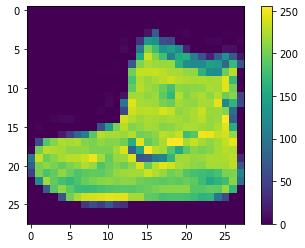

In [9]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.gca().grid(False)
plt.show()

In [10]:
# normalize to range 0-1 
X_train=X_train/255.0
X_test=X_test/255.0

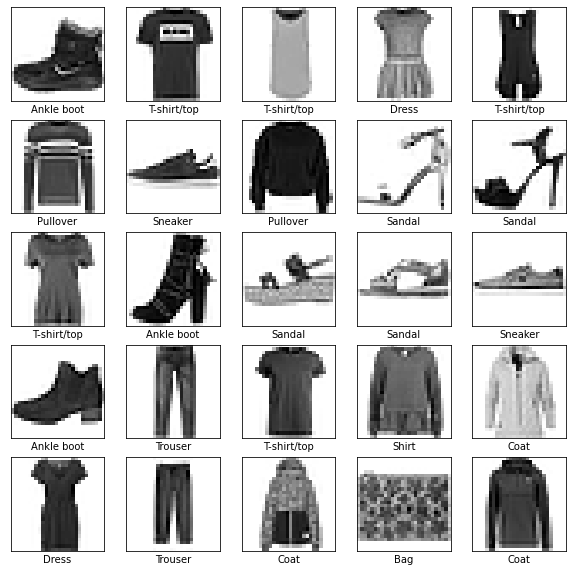

In [11]:
#Show the label corresponding to the picture
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
    
plt.show()

### Model 1- Neural network

In [12]:
#Use Grid Search to tune the hyperparameters of neural network
from sklearn.model_selection import GridSearchCV

#Model Compilation
def create_model(layer):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(layer, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

#Train the model
model = keras.wrappers.scikit_learn.KerasClassifier(create_model)
param_grid = {'layer': [32, 64, 128, 256]} #The value of the parameter that needs to be optimized
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5, n_jobs=1)#use 5-fold cross-validation
grid_result = grid.fit(X_train,y_train)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.6002 - accuracy: 0.7923


<p> Above result, during model training, loss and accuracy indicators are displayed.As the number of iterations increases， the accuracy of this model on the training data is about 0.82 (or 82%)</p>

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics
import numpy as np

# chose the best parameter to train the model again
print("Best parameter: ", grid_result.best_params_)
best_model = create_model(grid_result.best_params_['layer'])#The combination of parameters describing the best results
best_model.fit(X_train, y_train)
predict = best_model.predict(X_test)

print('select the epoch where the model achieved the best accuracy. \n In addition, you can stop the training when the accuracy is not improving, given a threshold')

print("\n--------------------classification_report------------------")

print(metrics.classification_report (y_test, np.argmax(predict, axis = 1),target_names=class_names))

predict = predict.argmax(1)
cnn_cm_mnist = metrics.confusion_matrix(y_test, predict)


print("Confusion matrix: \n", cnn_cm_mnist)



Best parameter:  {'layer': 256}
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6116 - accuracy: 0.7843
select the epoch where the model achieved the best accuracy. 
 In addition, you can stop the training when the accuracy is not improving, given a threshold

--------------------classification_report------------------
              precision    recall  f1-score   support

 T-shirt/top       0.76      0.88      0.81      1000
     Trouser       0.97      0.96      0.97      1000
    Pullover       0.86      0.57      0.69      1000
       Dress       0.88      0.83      0.86      1000
        Coat       0.58      0.93      0.71      1000
      Sandal       0.98      0.92      0.95      1000
       Shirt       0.78      0.43      0.55      1000
     Sneaker       0.92      0.94      0.93      1000
         Bag       0.91      0.98      0.94      1000
  Ankle boot       0.93      0.96      0.95      1000

    accuracy                           0.84     10000
   macro a

- The below is on the basis of 5-fold cross-validation with epochs=10,on the basis of the best model

Epoch 1/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1286 - accuracy: 0.9510 - val_loss: 0.4163 - val_accuracy: 0.8846
Epoch 2/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1280 - accuracy: 0.9517 - val_loss: 0.3953 - val_accuracy: 0.8928
Epoch 3/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1229 - accuracy: 0.9542 - val_loss: 0.4082 - val_accuracy: 0.8883
Epoch 4/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1202 - accuracy: 0.9549 - val_loss: 0.4283 - val_accuracy: 0.8843
Epoch 5/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1181 - accuracy: 0.9550 - val_loss: 0.4209 - val_accuracy: 0.8876
Epoch 6/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1143 - accuracy: 0.9570 - val_loss: 0.4265 - val_accuracy: 0.8921
Epoch 7/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1152 - accuracy: 0.9576 - val_loss: 0.4307 - val_accuracy:

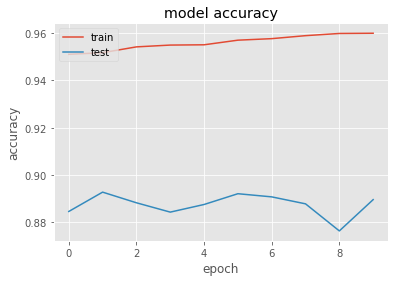

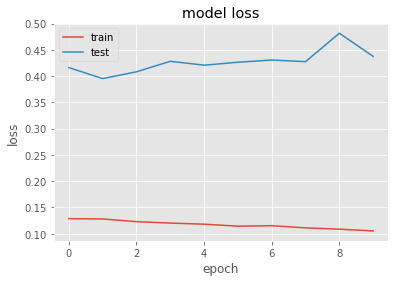

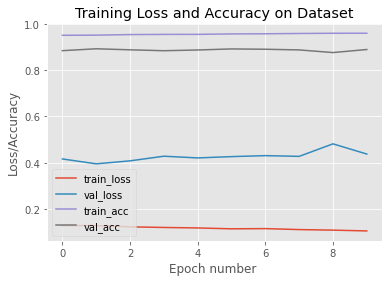

In [24]:
# Filter the best model training set and traverse 10 times with epochs
# validation_data:Each epoch will be verified with a validation set
history = best_model.fit(X_train,y_train,epochs=10,validation_split=0.3)
history_predict = best_model.predict(X_test).argmax(1)

accuracy = accuracy_score(y_test, history_predict)
precision = precision_score(y_test, history_predict, average='micro')
recall = recall_score(y_test, history_predict, average='micro')
f1 = f1_score(y_test, history_predict, average='micro')
print('\n accuracy: ', accuracy, 'precision: ', precision, 'recall: ', recall ,'f1 :',f1)

#Display the history of loss and accuracy
history.history


# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

# summarize history for loss plt.plot(history.history['loss']) plt.plot(history.history['val_loss']) plt.title('model loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

#plot the training loss and accuracy

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), history.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch number ")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")
plt.show()

In [25]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.128553,0.951024,0.416333,0.884611
1,0.128011,0.951714,0.395319,0.892778
2,0.122885,0.954167,0.408219,0.888278
3,0.120168,0.954929,0.428259,0.884333
4,0.118065,0.955048,0.420880,0.887556
5,0.114286,0.957000,0.426465,0.892111
6,0.115170,0.957643,0.430702,0.890778
7,0.111044,0.958905,0.427562,0.887833
8,0.108560,0.959833,0.481691,0.876389
9,0.105231,0.959929,0.437637,0.889611


In [26]:
# Evaluate the best model on the test data using `evaluate`
print("Evaluate on test data")
results = best_model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

Evaluate on test data
313/313 [==============================] - 0s 700us/step - loss: 0.4928 - accuracy: 0.8838
test loss, test acc: [0.49277281761169434, 0.8838000297546387]


<p> When we train the two neural network models ,the result showed the second neural network with 5 folds validation,10 times with epochs is better than first neural network. With two training models we trained, the accuracy rate is also improving.</p>
<p> we get the average results : accuracy:  0.8838 precision:  0.8838 recall:  0.8838 f1 : 0.8838</p>

- Predict the  neural network model

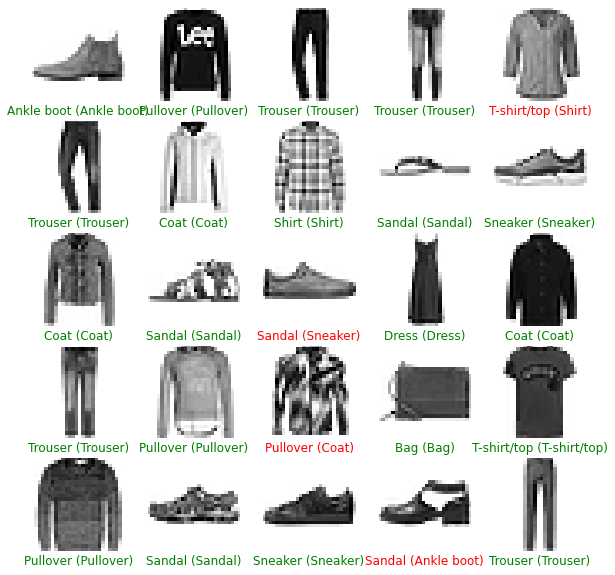

In [35]:
import numpy as np
history_predict = best_model.predict(X_test)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(history_predict[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label],
                                class_names[true_label]),
               color=color)
plt.show()

### Model 2-LogisticRegression

In [36]:
import collections
from sklearn import preprocessing
import numpy as np
import pandas as pd
import time
from sklearn import metrics
from IPython.display import Markdown, display
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [37]:
# caculate logistic regression running time
import warnings

start = time.time()


from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')

X_train_flatten = X_train.reshape(X_train.shape[0], -1)
param_grid= {
    'tol': [0.0001, 0.001],
    'max_iter': [100, 200, 300]
}
grid_lr = GridSearchCV(estimator=LogisticRegression(multi_class='multinomial'),cv=5, param_grid=param_grid)
grid_result_lr = grid_lr.fit(X_train_flatten, y_train)
grid_result_lr.best_params_


end = time.time()
logistic_time = end-start
print("Logitic regression Time: {:0.2f} minute".format(logistic_time/60.0))
print("Best parameter: ", grid_result_lr.best_params_)

Logitic regression Time: 13.92 minute
Best parameter:  {'max_iter': 100, 'tol': 0.0001}


In [38]:
X_test_flatten = X_test.reshape(X_test.shape[0], -1)
lr_predict = grid_result.best_estimator_.predict(X_test_flatten)
lr_accuracy = accuracy_score(y_test, lr_predict)
lr_precision = precision_score(y_test, lr_predict, average='micro')
lr_recall = recall_score(y_test, lr_predict, average='micro')
lr_f1 = f1_score(y_test, lr_predict, average='micro')
print('accuracy: ', lr_accuracy, 'precision: ', lr_precision, 'recall: ', lr_recall,'F1 :',lr_f1)

accuracy:  0.8398 precision:  0.8398 recall:  0.8398 F1 : 0.8398


- -----------------------------------------------------------------------

- Next ,we use Random Forest,Decision Tree,SVM ,KNN model to train the data performance.

### Data transformation

In [39]:
#Converted into a two-dimensional array
X_train_1 = X_train.reshape(X_train.shape[0], -1)
X_test_1 = X_test.reshape(X_test.shape[0], -1)
print(X_train_1.shape)
print(X_test_1.shape)

(60000, 784)
(10000, 784)


- Running time for Random Forest and Decision Tree

In [40]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier?

In [41]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


# Random Forest
start1 = time.time()

random_forest = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100)
random_forest.fit(X_train_1, y_train)

end1 = time.time()
forest_time = end1-start1

# Decision Tree
start2 = time.time()

tree = DecisionTreeClassifier(max_depth=100, criterion='entropy')
tree.fit(X_train_1, y_train)

end2 = time.time()
tree_time = end2-start2


print("Random Forest Time: {:0.2f} minute".format(forest_time/60.0))
print("Decision Tree Time: {:0.2f} minute".format(tree_time/60.0))

Random Forest Time: 1.96 minute
Decision Tree Time: 0.69 minute


- 5-fold cross validation for <b> Rondom Forest </b> and <b> Decision Tree</b>

In [42]:
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision_macro', 'recall_macro','f1_macro']
k = 5

random_forest_cv = cross_validate(random_forest, X_train_1, y_train, scoring=scoring, cv=k)
rf_accuracy_mean = random_forest_cv["test_accuracy"].mean()
rf_precision_mean = random_forest_cv["test_precision_macro"].mean()
rf_recall_mean = random_forest_cv["test_recall_macro"].mean()
rf_f1_mean = random_forest_cv["test_f1_macro"].mean()

print(f'random_forest {k}-fold:')
print(f'accuracy_mean: {rf_accuracy_mean}, precision_mean: {rf_precision_mean}, recall_mean: {rf_recall_mean}, f1_mean: {rf_f1_mean}')



tree_cv = cross_validate(tree, X_train_1, y_train, scoring=scoring, cv=k)
tree_accuracy_mean = tree_cv["test_accuracy"].mean()
tree_precision_mean = tree_cv["test_precision_macro"].mean()
tree_recall_mean = tree_cv["test_recall_macro"].mean()
tree_f1_mean = tree_cv["test_f1_macro"].mean()

print(f'Decision Tree {k}-fold:')
print(f'accuracy_mean: {tree_accuracy_mean}, precision_mean: {tree_precision_mean}, recall_mean: {tree_recall_mean}, f1_mean: {tree_f1_mean}')

random_forest 5-fold:
accuracy_mean: 0.8835000000000001, precision_mean: 0.8827383868480009, recall_mean: 0.8835000000000001, f1_mean: 0.8818324792358746
Decision Tree 5-fold:
accuracy_mean: 0.80465, precision_mean: 0.805125185716651, recall_mean: 0.80465, f1_mean: 0.804819737228111


- Running time for SVM and KNN

In [43]:
# SVM Model
start3 = time.time()

svc = SVC(C=1, kernel='linear', gamma="auto")
svc.fit(X_train_1, y_train)

end3 = time.time()
svm_time = end3-start3

# KNN Model
start4 = time.time()

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_1, y_train)
y_pred_knn = knn.predict(X_test_1)

end4 = time.time()
knn_time = end4-start4
print("SVM Time: {:0.2f} minute".format(svm_time/60.0))
print("KNN Time: {:0.2f} minute".format(knn_time/60.0))

SVM Time: 12.26 minute
KNN Time: 14.57 minute


- 5-fold cross validation for <b>SVM</b> and <b>KNN</b>

In [44]:
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision_macro', 'recall_macro','f1_macro']
k = 5

svc_cv = cross_validate(svc, X_train_1, y_train, scoring=scoring, cv=k)
svc_accuracy_mean = svc_cv["test_accuracy"].mean()
svc_precision_mean = svc_cv["test_precision_macro"].mean()
svc_recall_mean = svc_cv["test_recall_macro"].mean()
svc_f1_mean = svc_cv["test_f1_macro"].mean()

print(f'SVM {k}-fold:')
print(f'accuracy_mean: {svc_accuracy_mean}, precision_mean: {svc_precision_mean}, recall_mean: {svc_recall_mean},f1_mean: {svc_f1_mean}')

knn_cv = cross_validate(knn, X_train_1, y_train, scoring=scoring, cv=k)
knn_accuracy_mean = knn_cv["test_accuracy"].mean()
knn_precision_mean = knn_cv["test_precision_macro"].mean()
knn_recall_mean = knn_cv["test_recall_macro"].mean()
knn_f1_mean = knn_cv["test_f1_macro"].mean()
print(f'KNN {k}-fold:')
print(f'accuracy_mean: {knn_accuracy_mean}, precision_mean: {knn_precision_mean}, recall_mean: {knn_recall_mean}, f1_mean: {knn_f1_mean}')

SVM 5-fold:
accuracy_mean: 0.8552500000000001, precision_mean: 0.8546819771455354, recall_mean: 0.8552500000000001,f1_mean: 0.8544717507698941
KNN 5-fold:
accuracy_mean: 0.8540000000000001, precision_mean: 0.8568205772037777, recall_mean: 0.8540000000000001, f1_mean: 0.8532605720828637


- <b>Random Forest</b> report and analysis (without using any features extraction method)

In [45]:
# Random Forest report and analysis
y_pred_forest = random_forest.predict(X_test_1)
random_forest_f1 = metrics.f1_score(y_test, y_pred_forest, average= "weighted")
random_forest_accuracy = metrics.accuracy_score(y_test, y_pred_forest)
random_forest_recall = metrics.recall_score(y_test, y_pred_forest, average= "weighted")
random_forest_precision = metrics.precision_score(y_test, y_pred_forest, average= "weighted")
random_forest_cm = metrics.confusion_matrix(y_test, y_pred_forest)
print("-----------------Random Forest Report---------------")
print("F1 score: {}".format(random_forest_f1))
print("Accuracy score: {}".format(random_forest_accuracy))
print("Recall score: {}".format(random_forest_recall))
print("Precision score: {}\n".format(random_forest_precision))
print("Confusion matrix: \n", random_forest_cm)
print(metrics.classification_report(y_test, y_pred_forest))

-----------------Random Forest Report---------------
F1 score: 0.8750762976896076
Accuracy score: 0.8767
Recall score: 0.8767
Precision score: 0.8756445011803433

Confusion matrix: 
 [[866   0  11  30   5   1  75   0  12   0]
 [  3 962   1  23   5   0   4   0   2   0]
 [ 10   0 802  10 120   0  54   0   4   0]
 [ 18   3  13 907  29   0  28   0   2   0]
 [  1   0  91  38 817   0  51   0   2   0]
 [  0   0   0   1   0 956   0  31   1  11]
 [154   1 123  29  88   1 584   0  20   0]
 [  0   0   0   0   0  13   0 951   0  36]
 [  2   2   2   2   6   1   4   4 976   1]
 [  0   0   0   0   0   8   0  43   3 946]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.80      0.79      1000
           3       0.87      0.91      0.89      1000
           4       0.76      0.82      0.79      1000
           5       0.98      0.96      0.97      1000
       

- <b>Decision Tree </b>report and analysis(without using any features extraction method)

In [46]:
# Decision Tree report and analysis
y_pred_tree = tree.predict(X_test_1)
tree_f1 = metrics.f1_score(y_test, y_pred_tree, average= "weighted")
tree_accuracy = metrics.accuracy_score(y_test, y_pred_tree)
tree_recall = metrics.recall_score(y_test, y_pred_tree, average= "weighted")
tree_precision = metrics.precision_score(y_test, y_pred_tree, average= "weighted")

tree_cm = metrics.confusion_matrix(y_test, y_pred_tree)
print("-----------------Decision Tree Report---------------")
print("F1 score: {}".format(tree_f1))
print("Accuracy score: {}".format(tree_accuracy))
print("Recall score: {}".format(tree_recall))
print("Precision score: {}\n".format(tree_precision))

print("Confusion matrix: \n", tree_cm)


print(metrics.classification_report(y_test, y_pred_tree))

-----------------Decision Tree Report---------------
F1 score: 0.8011002506159314
Accuracy score: 0.8005
Recall score: 0.8005
Precision score: 0.8020010572996605

Confusion matrix: 
 [[733   4  23  41  10   4 173   1   9   2]
 [  6 949   7  23   4   0   8   0   3   0]
 [ 20   0 683  18 141   0 127   0  10   1]
 [ 43  29  16 786  61   0  54   0   9   2]
 [ 11   2 160  42 669   0 109   0   7   0]
 [  2   1   1   2   1 896   1  62   8  26]
 [135   9 116  35 100   1 574   0  29   1]
 [  0   0   0   0   0  62   0 884   5  49]
 [  5   5  12   9   4  11  14   9 925   6]
 [  0   1   1   0   0  21   0  67   4 906]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1000
           1       0.95      0.95      0.95      1000
           2       0.67      0.68      0.68      1000
           3       0.82      0.79      0.80      1000
           4       0.68      0.67      0.67      1000
           5       0.90      0.90      0.90      1000
       

- <b>SVM</b> report and analysis(without using any features extraction method)

In [47]:
# SVM report and analysis
from sklearn.metrics import plot_confusion_matrix
y_pred_svc = svc.predict(X_test_1)
svc_f1 = f1_score(y_test, y_pred_svc, average= "weighted")
svc_accuracy = accuracy_score(y_test, y_pred_svc)
svc_recall = metrics.recall_score(y_test, y_pred_svc, average= "weighted")
svc_precision = metrics.precision_score(y_test, y_pred_svc, average= "weighted")

svc_cm = metrics.confusion_matrix(y_test, y_pred_svc)
print("-----------------SVM Report---------------")
print("F1 score: {}".format(svc_f1))
print("Accuracy score: {}".format(svc_accuracy))
print("Recall score: {}".format(svc_recall))
print("Precision score: {}\n".format(svc_precision))

print("Confusion matrix: \n", svc_cm)
print('Plotting confusion matrix')


print(metrics.classification_report(y_test, y_pred_svc))

-----------------SVM Report---------------
F1 score: 0.8456969698281024
Accuracy score: 0.8464
Recall score: 0.8464
Precision score: 0.8457883954572292

Confusion matrix: 
 [[815   2  13  45   4   1 108   0  12   0]
 [  6 962   2  22   3   0   4   0   1   0]
 [ 22   6 769   8 109   0  79   0   7   0]
 [ 54  15  19 842  27   0  40   0   3   0]
 [  1   2 113  33 774   0  72   0   5   0]
 [  1   0   0   1   0 936   0  38   3  21]
 [174   2 122  30  93   0 562   0  17   0]
 [  0   0   0   0   0  38   0 934   1  27]
 [ 12   1   8   8   2  15  25   4 925   0]
 [  0   0   0   0   0  15   1  39   0 945]]
Plotting confusion matrix
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1000
           1       0.97      0.96      0.97      1000
           2       0.74      0.77      0.75      1000
           3       0.85      0.84      0.85      1000
           4       0.76      0.77      0.77      1000
           5       0.93      0.94      0.93  

- <b>KNN</b> report and analysis(without using any features extraction method)

In [48]:
# KNN report and analysis
knn_f1 = metrics.f1_score(y_test, y_pred_knn, average= "weighted")
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_precision = metrics.precision_score(y_test, y_pred_knn, average= "weighted")
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_recall = metrics.recall_score(y_test, y_pred_knn, average= "weighted")
knn_precision = metrics.precision_score(y_test, y_pred_knn, average= "weighted")
knn_cm = metrics.confusion_matrix(y_test, y_pred_knn)
print("-----------------K-nearest neighbors Report---------------")
print("F1 score: {}".format(knn_f1))
print("Accuracy score: {}".format(knn_accuracy))
print("Recall score: {}".format(knn_recall))
print("Precision score: {}\n".format(knn_precision))
print("Confusion matrix: \n", knn_cm)

print(metrics.classification_report(y_test, y_pred_knn))

-----------------K-nearest neighbors Report---------------
F1 score: 0.8546439722018904
Accuracy score: 0.8554
Recall score: 0.8554
Precision score: 0.8578152450755355

Confusion matrix: 
 [[855   1  17  16   3   1 100   1   6   0]
 [  8 968   4  12   4   0   3   0   1   0]
 [ 24   2 819  11  75   0  69   0   0   0]
 [ 41   8  15 860  39   0  34   0   3   0]
 [  2   1 126  26 773   0  71   0   1   0]
 [  1   0   0   0   0 822   5  96   1  75]
 [176   1 132  23  80   0 575   0  13   0]
 [  0   0   0   0   0   3   0 961   0  36]
 [  2   0  10   4   7   0  16   7 953   1]
 [  0   0   0   0   0   2   1  29   0 968]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.82      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.79      0.77      0.78      1000
           5       0.99      0.82      0.90      1000
 

------------------------------------------------------

### Task 1 Summary :

The best model is <b>neural network model</b>. And accuracy rate,precision score, recall score ,F1 socre is the highest compare with other models. Here is the summary score as the following:

 - 5-fold cross valiadation model

|   Model   |   Accuracy   |   Precision   |   Recall   |   F1   |
| ----- | ----- | ----- | ----- | ----- |
| 5-fold Neural network | 0.8838 | 0.8838 | 0.8838| 0.8838  | 
| 5-fold Logistic regression | 0.8398 | 0.8398 | 0.8398| 0.8398  | 
| 5-Fold Random forest | 0.8835 | 0.8827 | 0.8835 | 0.8818 | 
| 5-Fold Decision Tree | 0.8046 | 0.8051| 0.8846 | 0.8048 | 
| 5-Fold SVM | 0.8552 | 0.8546 | 0.8552 | 0.8547 | 
| 5-Fold KNN | 0.8540 | 0.8568 | 0.8540 | 0.8532 |

- Without features default model

|   Model   |   Accuracy   |   Precision   |   Recall   |   F1   |
| ----- | ----- | ----- | ----- | ----- |
| Random forest | 0.8767 | 0.8756 | 0.8767 | 0.8750 | 
| Decision Tree | 0.8005 | 0.8020| 0.8005 | 0.8011 | 
| SVM | 0.8464 | 0.8457 | 0.8464 | 0.8456 | 
| KNN | 0.8554 | 0.8578 | 0.8554 | 0.8546 |

- For evaluate those above models, use <b> 5 folds cross valiadation method</b> and <b>without features default method</b> to compare different results.
- We found in test set, the performance like accuracy rate, f1 score,etc ,where the cross validation methods is better than the default model( without features).Especially on the basis of 5 fold cross valiadation in neural network model, 10 times of epoch are added, which leads to an increase in the (accurate)recognition rate of pictures at the same time. 


- The reason is that cross-validation is used to evaluate the prediction performance of the model, especially the performance of a trained model on new data, which can reduce overfitting to a certain extent. We can also obtain as much effective information as possible from limited data.

- In out of sample data ,best test model is 5-fold cross valiadation model - Neural network model, the accuracy rate is 88.38%% ,higher accuracy indicates that the test set predicts better in image recognition .<br>The second best model is Random forest with 5-fold cross valiadation, accuracy rate is 88.35%, both model difference is small.
<br>We will compare and predict those models in task 2.

# Task 2 

- From the above task 1 , we get the best model is <b>neural network</b>,beacuse the highest accuracy rate is 88%.

- The accuracy of the two models is similar, but I still want to predict which model is more accurate in predicting the image label.

<b>First best model- Neural network</b>

In [68]:
import os
from PIL import Image
import numpy as np


test_img = []
img_names = []
for file in os.listdir('task2 pictures'):
    image = Image.open(f'task2 pictures/{file}').convert('L').resize((28, 28))#grayscale
    img_data = np.array(image.getdata()) / 255
    # white background
    img_data[img_data == 1] = 0
    test_img.append(img_data)
    img_names.append(file.split('.')[0])
test_img = np.array(test_img).reshape(len(test_img), 28,28)

In [69]:
X_train = X_train_1.reshape(X_train_1.shape[0], X_train.shape[2],-1)
X_test = X_test_1.reshape(X_test_1.shape[0], X_test.shape[2],-1)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [70]:
# Avoid tensorflow version warning

In [71]:
import traceback
import contextlib


# Some helper code to demonstrate the kinds of errors you might encounter.
@contextlib.contextmanager
def assert_raises(error_class):
    try:
        yield
    except error_class as e:
        print('Caught expected exception \n  {}:'.format(error_class))
        traceback.print_exc(limit=2)
    except Exception as e:
        raise e
    else:
        raise Exception('Expected {} to be raised but no error was raised!'.format(error_class))

In [72]:
from sklearn.model_selection import GridSearchCV

best1_model = create_model(grid_result.best_params_['layer'])

best1_model.fit(X_train, y_train)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.4791 - accuracy: 0.8292


- Visualize all the images

<Figure size 720x720 with 0 Axes>

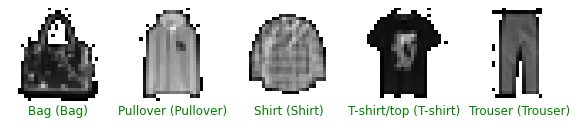

In [73]:
plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(1, 5, figsize=(10, 10)) 
cnn_predict = best1_model.predict(test_img).argmax(1)
for i in range(5):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_img[i], cmap=plt.cm.binary)
    predicted_label = class_names[cnn_predict[i]]
    true_label = img_names[i]
    if true_label in predicted_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(predicted_label, true_label),color=color)
plt.show()

In [74]:
class_names = np.array(['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])
index = np.array([0,1,2,3,4,5,6,7,8,9])
keys=index
values = class_names
newsort = dict(zip(keys,values))

print(newsort)

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


In [75]:
print('Label prediction for index %d' %cnn_predict[0])

Label prediction for index 8


- <b>How accurate is the final result?</b>
<p> From the above neural network, those all images was identified correctly.And each label also be correctly identified.

<b>（optional) Second best model - Random Forest</b>

In [57]:
import os
from PIL import Image
import numpy as np


test_img = []
img_names = []
for file in os.listdir('task2 pictures'):
    image = Image.open(f'task2 pictures/{file}').convert('L').resize((28,28))#grayscale
    img_data = np.array(image.getdata()) / 255
    # make white background 
    img_data[img_data == 1] = 0
    test_img.append(img_data)
    img_names.append(file.split('.')[0])
test_img = np.array(test_img).reshape(5, 28*28)

In [58]:
print(test_img.shape)

(5, 784)


In [59]:
X_train_2 = X_train.reshape(X_train.shape[0], -1)
X_test_2 = X_test.reshape(X_test.shape[0], -1)
print(X_train_2.shape)
print(X_test_2.shape)

(60000, 784)
(10000, 784)


In [60]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100)
random_forest.fit(X_train_2, y_train)

RandomForestClassifier(criterion='entropy', max_depth=70)

In [61]:
random_forest.predict(test_img.reshape(test_img.shape[0], -1))

array([8, 4, 6, 0, 1], dtype=uint8)

- Visualize all the images

<Figure size 720x720 with 0 Axes>

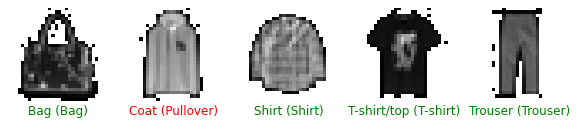

In [67]:
plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(1, 5, figsize=(10, 10)) 
rdm_predict = random_forest.predict(test_img)
for i in range(5):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_img[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = class_names[rdm_predict[i]]
    true_label = img_names[i]
    if true_label in predicted_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(predicted_label, true_label),color=color)
plt.show()

In [63]:
class_names = np.array(['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])
index = np.array([0,1,2,3,4,5,6,7,8,9])
class_names = np.array(['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])
index = np.array([0,1,2,3,4,5,6,7,8,9])
keys=index
values = class_names
newsort = dict(zip(keys,values))

print(newsort)

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


In [64]:
print('Label prediction for index %d' %rdm_predict[0])

Label prediction for index 8


- <b>How accurate is the final result?</b>
<p> From the above random forest model, above 5 images, one of images was not identified correctly,pullover is recognized as coat.But the error is not particularly large.

### Task 2 Summary

<p>Neural network is better than other models in image recognition.In Neural network model, all images are correctly recognized.In random forest model, only one image was not recognized, but this does not prevent the advantages of these two models in recognizing images, although both accurate rate is similar.</p>

# Thank you so much!

### Output

<ul>
    <li>Make sure to put descriptive comments on your code</li>
    <li>Use the markdown cell format in Jupiter to add your own interpretation to the result in each section.</li>
    <li>Make sure to keep the output of your runs when you want to save the final version of the file.</li>
    <li>The final work should be very well structured and should have a consistent flow of analysis.</li>
</ul>

#### Due Date: Nov 9 2020 at 11:59 PM

## Grading Criteria

<table style="width:400px;height:200px;border:1px black solid; background-color:white">
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Comprehensiveness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Correctness</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Complete Report</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Clear Code</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Innovation (Extra)</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:center;border:1px black solid;color:red"><u>Total</u></th>
        <td style="text-align:center;border:1px black solid;color:red"><b stlyle="color:red">110%</b></td>
    </tr>
</table>